<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Import Libraries
</h1>


In [16]:
# Data Manipulation Libraries
import pandas as pd        

# Visualization Libraries
import matplotlib.pyplot as plt  
import seaborn as sns            

# Machine Learning Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler     
from sklearn.preprocessing import MinMaxScaler        
from sklearn.preprocessing import LabelEncoder       
from sklearn.feature_selection import chi2           
from sklearn import metrics                           

# Feature Selection Algorithms
from skfeature.function.similarity_based import fisher_score  

# Multicollinearity and Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Deep Learning Libraries (TensorFlow and Keras)
import tensorflow as tf                     
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau  
from keras import layers                    
import keras                                
from keras.optimizers import Adam          
from keras.models import load_model         

# For Saving the Scaler
import joblib 

import sweetviz as sv
# pip install keras-tuner
import keras_tuner

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Loading and Exploring the dataset
</h1>


In [17]:
# Load the data  and reading the csv file
df = pd.read_csv("adm_data.csv")

In [18]:
df.head(5)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

<div style="background-color:#e0f4f7; padding:30px; border-radius:15px; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#004d40; border: 2px solid #00796b; max-width: 800px; margin:auto;">
    <h4 style="color:#004d40; font-size:22px; margin-bottom:5px;">GRE (Graduate Record Examination)</h4>
    <h4 style="color:#004d40; font-size:22px; margin-bottom:5px;">SOP (Statement of Purpose)</h4>
    <h4 style="color:#004d40; font-size:22px; margin-bottom:5px;">LOR (Letter of Recommendation)</h4>
    <h4 style="color:#004d40; font-size:22px; margin-bottom:5px;">CGPA (Cumulative Grade Point Average)</h4>
</div>


In [19]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [20]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

In [21]:
# Find duplicate rows
duplicates = df.duplicated().sum()

duplicates

0

In [22]:
# Removing the "Serial No", this is useless column and does not mean anything.
df = df.drop("Serial No.", axis=1)

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Visualization
</h1>


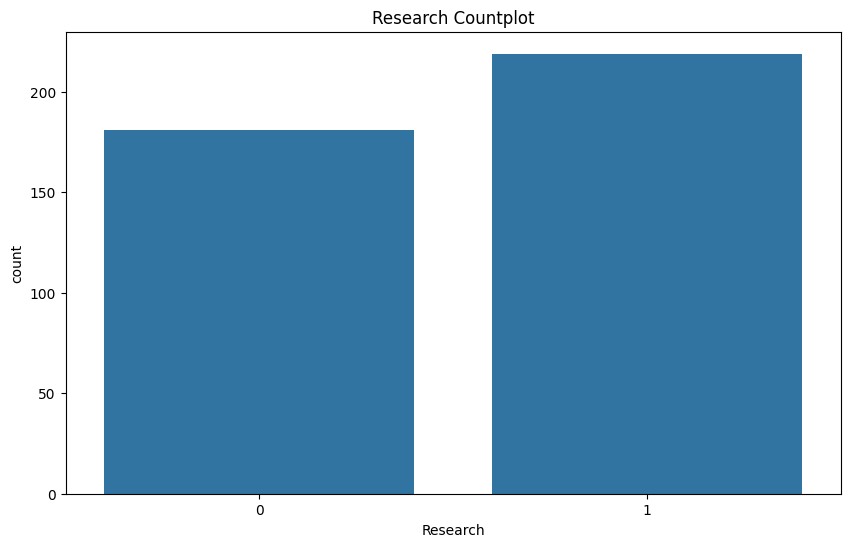

In [23]:
# Visualizing the Research column
plt.figure(figsize=(10, 6))
sns.countplot(x="Research", data=df)
plt.title("Research Countplot")
plt.show()

This shows that most of applicant for university did the Research. 

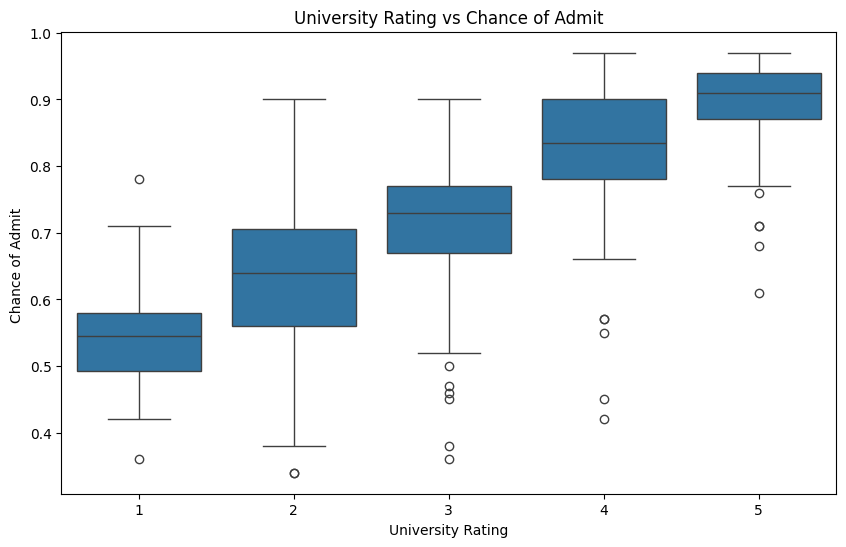

In [24]:
# Visualizing th University Rating vs chance of admit column
plt.figure(figsize=(10, 6))
sns.boxplot(x="University Rating", y="Chance of Admit ", data=df)
plt.title("University Rating vs Chance of Admit")
plt.show()

It shows that to get admission the top universities is hard, the chance for the first rate is lower than others.


In [25]:
from ydata_profiling import ProfileReport


# Create a profile report
profile = ProfileReport(df, title="adam.cvs")

# Export the report to an HTML file
profile.to_file("Admission.html")

# To view directly in a Jupyter Notebook, use:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

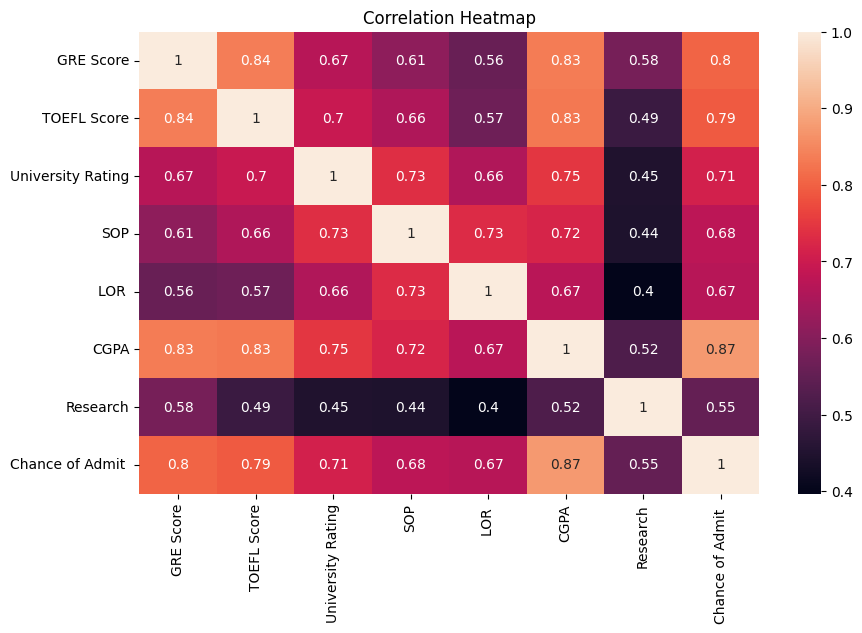

In [26]:
# Visualizing the correlation between the columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


Between GRE and CGPA are  strong correlation, TOEFL Score University Rating also show to strong correlations with the chance of admission.
GRE and TOEFL scores are highly correlated with each other.

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Data Preprocessing
</h1>


In [27]:
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [28]:
# I need multiply the chance of admit column by 100 to make it easier to understand
df["Chance of Admit "] = df["Chance of Admit "] * 100

# Display the updated dataframe
df.head()


GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              92.0  
1              76.0  
2              72.0  
3              80.0  
4              65.0

In [29]:
# Check the Multicollinearity between the columns
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data


feature          VIF
0          GRE Score  1607.928316
1        TOEFL Score  1373.804681
2  University Rating    22.998812
3                SOP    38.051007
4               LOR     39.774185
5               CGPA  1333.886926
6           Research     3.211789
7   Chance of Admit    108.476950

Here three columns have high multicollinearity.

In [30]:
# let's check the ootliers in the dataset with Q1, Q3 and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers 

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 1
Research             0
Chance of Admit      2
dtype: int64

Only three columns have outliers values

In [31]:
import numpy as np
for col in df.columns:
    median = df[col].median()
    df[col] = np.where(df[col] > (Q3[col] + 1.5 * IQR[col]), median, df[col])
    df[col] = np.where(df[col] < (Q1[col] - 1.5 * IQR[col]), median, df[col])

# Check the outliers after handling
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outliers, columns=["Outliers"])
outliers


Outliers
GRE Score                 0
TOEFL Score               0
University Rating         0
SOP                       0
LOR                       0
CGPA                      0
Research                  0
Chance of Admit           0

GRE Score, University Rating and TOEFL Score have more impact on the target value than others.

In [32]:
#Combine by averaging the values
#df['GRE_TOEFL_Average'] = (df['GRE Score'] + df['TOEFL Score'])
#df = df.drop(['GRE Score', 'TOEFL Score'], axis=1)

#df = df.drop(['TOEFL Score'], axis=1)

In [33]:
df.describe()

GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  400.000000   400.000000         400.000000  400.000000  400.00000   
mean   316.807500   107.410000           3.087500    3.400000    3.45875   
std     11.473646     6.069514           1.143728    1.006869    0.89003   
min    290.000000    92.000000           1.000000    1.000000    1.50000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

            CGPA    Research  Chance of Admit   
count  400.00000  400.000000        400.000000  
mean     8.60345    0.547500         72.630000  
std      0.58946    0.498362         13.997605  
min      7.20000    0.000000         36.000000  
25%      8.17750    0.000000         64.000000  
50%      8.61500    1.000000         73.000000  
75%      9.06250    1.000000         83.000000  
max      9.92000    1.000000         97.000000

In [34]:
# Since my dataset is small, I will use CTGAN to generate new data


from ctgan import CTGAN

# I used the CTGAN model to generate data but model generated data which does not make sense
# for example the chance of admit is above 100 percent or the GRE score is above 340
# So before using the generated data I need to define acceptable ranges for the columns

# Define the acceptable ranges for the columns
def ranges(df):
    df["GRE Score"] = df["GRE Score"].clip(290, 340)
    df["TOEFL Score"] = df["TOEFL Score"].clip(92, 120)
    df["University Rating"] = df["University Rating"].clip(1, 5)
    df["SOP"] = df["SOP"].clip(1, 5)
    df["LOR "] = df["LOR "].clip(1.50, 5)
    df["CGPA"] = df["CGPA"].clip(7.20, 9.92)
    df["Research"] = df["Research"].clip(0, 1)
    df["Chance of Admit "] = df["Chance of Admit "].clip(36, 97)
    
    return df

# I will Generate 1000 samples
ctgan = CTGAN()
ctgan.fit(df, epochs=600)

# Generate 600 samples
samples = ctgan.sample(600)

# Apply clipping to the generated samples to ensure realistic values
samples = ranges(samples)

# Combine the clipped synthetic samples with the original dataset
df = pd.concat([df, samples])

In [35]:
df.describe()

GRE Score  TOEFL Score  University Rating          SOP         LOR   \
count  1000.000000  1000.000000        1000.000000  1000.000000  1000.000000   
mean    313.010192   108.262006           2.860902     2.874743     3.322199   
std      14.076494     7.421419           1.122901     1.187767     0.943554   
min     290.000000    92.000000           1.000000     1.000000     1.500000   
25%     301.536379   103.000000           2.000000     1.968137     2.604098   
50%     313.000000   108.413284           2.914965     3.000000     3.401218   
75%     323.900969   114.000000           3.899111     3.786580     4.000000   
max     340.000000   120.000000           5.000000     5.000000     5.000000   

              CGPA     Research  Chance of Admit   
count  1000.000000  1000.000000       1000.000000  
mean      8.372466     0.509321         67.476957  
std       0.716692     0.480208         14.912181  
min       7.200000     0.000000         36.000000  
25%       7.850094     0.000000         57.095236  
50%       8.374055     0.179213         68.000000  
75%       8.900137     1.000000         78.134824  
max       9.920000     1.000000         97.000000

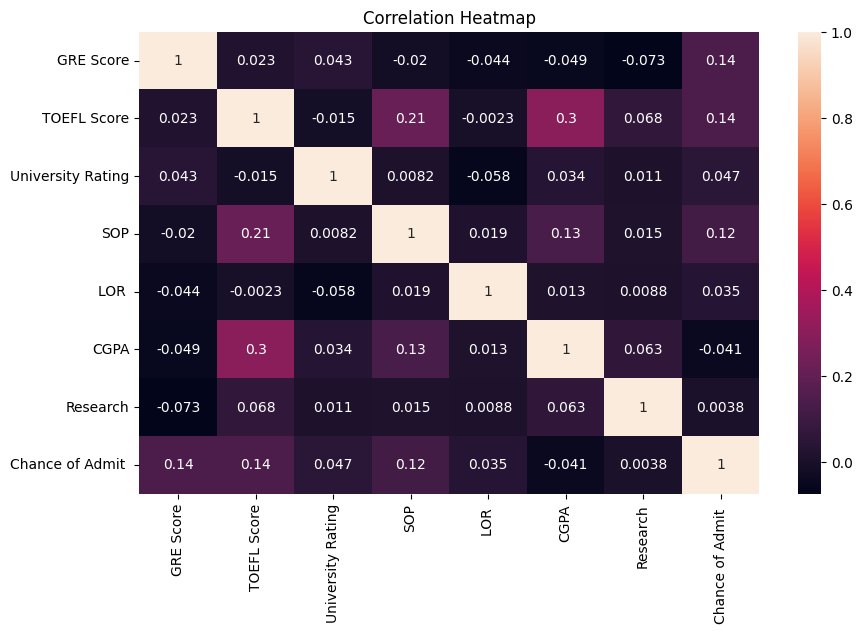

In [36]:
# Check the corelation between the columns after generating the data
plt.figure(figsize=(10, 6))
sns.heatmap(samples.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [37]:
# let's check the ootliers in the dataset with Q1, Q3 and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers 

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [38]:


# Handle the outliers in the "Chance of Admit" column
median = df["Chance of Admit "].median()
df["Chance of Admit "] = np.where(df["Chance of Admit "] > (Q3["Chance of Admit "] + 1.5 * IQR["Chance of Admit "]), median, df["Chance of Admit "])
df["Chance of Admit "] = np.where(df["Chance of Admit "] < (Q1["Chance of Admit "] - 1.5 * IQR["Chance of Admit "]), median, df["Chance of Admit "])

# Check the outliers after handling
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [39]:
# Check the Multicollinearity between the columns
vif_data = pd.DataFrame()
vif_data["feature"] = samples.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data

feature         VIF
0          GRE Score  239.899063
1        TOEFL Score  232.988799
2  University Rating    9.322222
3                SOP    9.124381
4               LOR    15.603731
5               CGPA  183.665948
6           Research    2.339641
7   Chance of Admit    30.205463

Here three columns are multicollinearity so I will combine them into a one column.

In [40]:
# Defining feature set (X) by dropping the target column
X = df.drop(columns=["Chance of Admit "], axis=1)
y = df["Chance of Admit "]

In [41]:
# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_features.fit(X_cat, y.astype(int))

# use decimal format in table
pd.options.display.float_format = '{:.2f}'.format

# the higher the score, the more effect that column has on the target
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns, df_features], axis=1)
f_scores.columns = ['Features', 'Score']
f_scores.sort_values(by='Score', ascending=False)


Features  Score
0          GRE Score 149.87
2  University Rating 146.71
3                SOP 140.44
1        TOEFL Score  96.74
6           Research  85.36
4               LOR   63.06
5               CGPA  14.69

In [42]:
df_multi = df[['GRE Score', 'TOEFL Score', 'CGPA']]


X_cat = df_multi.astype(int)
X_cat = X_cat.clip(lower=0)

chi_features = SelectKBest(chi2, k=len(X_cat.columns))
best_features = chi_features.fit(X_cat,y.astype(int))

# use decimal format in table
pd.options.display.float_format = '{:.2f}'.format

# the higher the score, the more effect that column has on the target
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(df_multi.columns)
f_score = pd.concat([df_columns,df_features],axis=1)
f_score.columns = ['Features','Score']
f_score.sort_values(by='Score',ascending=False)

Features  Score
0    GRE Score 149.87
1  TOEFL Score  96.74
2         CGPA  14.69

In [43]:
# After finding the score of each column, I will find the total score of each column
total_score =  f_score['Score'].sum()
total_score

261.30382564970387

In [44]:
# Calculate normalized weights and store them in the list
weights = [score / total_score for score in f_score['Score']]

# I need to sort the weights values and create a new  dataframe to store the weights and each column 
weights.sort(reverse=True) 
df_weights = pd.DataFrame(weights, columns=['Weights'])
df_weights['Features'] = f_score['Features']
df_weights

Weights     Features
0     0.57    GRE Score
1     0.37  TOEFL Score
2     0.06         CGPA

In [45]:
# After Finding the weight of each column, I will a create a new column 'photometric_filters' to store the weighted average of the photometric data columns
df['Admision Score'] = (df['GRE Score'] * df_weights['Weights'][0]) + (df['TOEFL Score'] * df_weights['Weights'][1]) + (df['CGPA'] * df_weights['Weights'][2])
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0     337.00       118.00               4.00 4.50  4.50  9.65      1.00   
1     324.00       107.00               4.00 4.00  4.50  8.87      1.00   
2     316.00       104.00               3.00 3.00  3.50  8.00      1.00   
3     322.00       110.00               3.00 3.50  2.50  8.67      1.00   
4     314.00       103.00               2.00 2.00  3.00  8.21      0.00   

   Chance of Admit   Admision Score  
0             92.00          237.52  
1             76.00          225.95  
2             72.00          220.20  
3             80.00          225.90  
4             65.00          218.69

In [46]:
# Since I have created a new column "Admision Score" I will drop the columns "GRE Score", "TOEFL Score" and "CGPA"
df = df.drop(['GRE Score', 'TOEFL Score', 'CGPA'], axis=1)
df.head()

University Rating  SOP  LOR   Research  Chance of Admit   Admision Score
0               4.00 4.50  4.50      1.00             92.00          237.52
1               4.00 4.00  4.50      1.00             76.00          225.95
2               3.00 3.00  3.50      1.00             72.00          220.20
3               3.00 3.50  2.50      1.00             80.00          225.90
4               2.00 2.00  3.00      0.00             65.00          218.69

In [47]:
# save the data to a new csv file
df.to_csv('Admission_data.csv', index=False)

In [48]:
# Load the data
df = pd.read_csv("Admission_data.csv")

In [49]:
df.head()

University Rating  SOP  LOR   Research  Chance of Admit   Admision Score
0               4.00 4.50  4.50      1.00             92.00          237.52
1               4.00 4.00  4.50      1.00             76.00          225.95
2               3.00 3.00  3.50      1.00             72.00          220.20
3               3.00 3.50  2.50      1.00             80.00          225.90
4               2.00 2.00  3.00      0.00             65.00          218.69

In [259]:
# Define the feature set (X) and the target (y)
X = df.drop(columns=["Chance of Admit "], axis=1)
y = df["Chance of Admit "]

In [225]:

sc = MinMaxScaler()
sc.fit(X)

X = sc.transform(X)  # Defining target variable (y)


In [226]:
# Splitting the data into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=101)

# Further splitting the temporary set into validation (15%) and test (15%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)


In [227]:
# Displaying the number of samples in each data split
print(f"Training data samples: {len(X_train)}")
print(f"Test data samples: {len(X_test)}")
print(f"Validation data samples: {len(X_val)}")

Training data samples: 750
Test data samples: 125
Validation data samples: 125


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Creating neural network structure
</h1>


In [55]:
variable_amount = X.shape[1]

In [270]:


# Save the best model based on validation loss
mc = ModelCheckpoint('best_model.regression2.keras', monitor='val_loss', mode='min', save_best_only=True)
#Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=100, mode='min', restore_best_weights=True)

# Define the neural network model
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),  
    Dense(10, activation='elu'),
    #BatchNormalization(),
    Dropout(0.02),
    Dense(8, activation='elu'),
   # BatchNormalization(),
    #Dropout(0.01),
    #Dense(16, activation='elu'),
    Dense(1) 
    ]
)

optimal_lr =0.0005
# Compile the model using Adam optimizer and mean squared error (MSE) loss
model.compile(optimizer=Adam(learning_rate=optimal_lr), loss='mse', metrics=['mae'])

# Display the model architecture summary
model.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_89          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_109 (Dropout)           │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 167 (668.00 B)

 Non-trainable params: 10 (40.00 B)

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Train the Neural network with your data
</h1

In [271]:


# List of callbacks including EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint
callback_list = [mc, early_stop]

# Fit the model on training data, using validation data for evaluation, with specified callbacks
history = model.fit(x=X_train, y=y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), callbacks=callback_list)


Epoch 1/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4882.3623 - mae: 68.3096 - val_loss: 4718.5396 - val_mae: 67.0932
Epoch 2/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4803.0513 - mae: 67.6853 - val_loss: 4701.8135 - val_mae: 66.9721
Epoch 3/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4755.1274 - mae: 67.3122 - val_loss: 4686.2080 - val_mae: 66.8594
Epoch 4/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4637.4648 - mae: 66.4727 - val_loss: 4670.5020 - val_mae: 66.7462
Epoch 5/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4690.0693 - mae: 66.9832 - val_loss: 4652.9619 - val_mae: 66.6197
Epoch 6/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4709.5786 - mae: 66.9761 - val_loss: 4632.6753 - val_mae: 66.4735
Epoch 7/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4675.0820 - mae: 66.7939 - val_loss: 4609.0459 - val_mae: 66.3029
Epoch 8/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4669.6909 - mae: 66.7076 - val_loss: 4579.7607 - val_mae:

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Evaluating Model
</h1

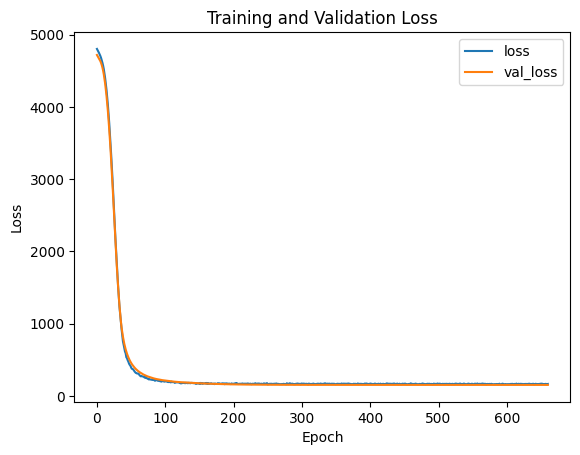

In [272]:

# Visualize the training and validation loss
losses = pd.DataFrame(history.history)
losses[['loss', 'val_loss']].plot()
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [273]:
# Load the best saved model from the file 'best_model.regression2.keras'
model = load_model('best_model.regression2.keras')

In [274]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[138.98284912109375, 9.199688911437988]

Train data evaluation:
[155.22769165039062, 9.77079963684082]


In [275]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.flatten())
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df.reset_index(drop=True), test_predictions.reset_index(drop=True)], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df.head(9)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Test True Y  Model Predictions
0        64.00              67.10
1        69.90              60.77
2        60.33              56.30
3        58.00              58.20
4        59.00              68.55
5        75.78              75.62
6        39.00              61.04
7        92.00              85.09
8        53.00              63.48

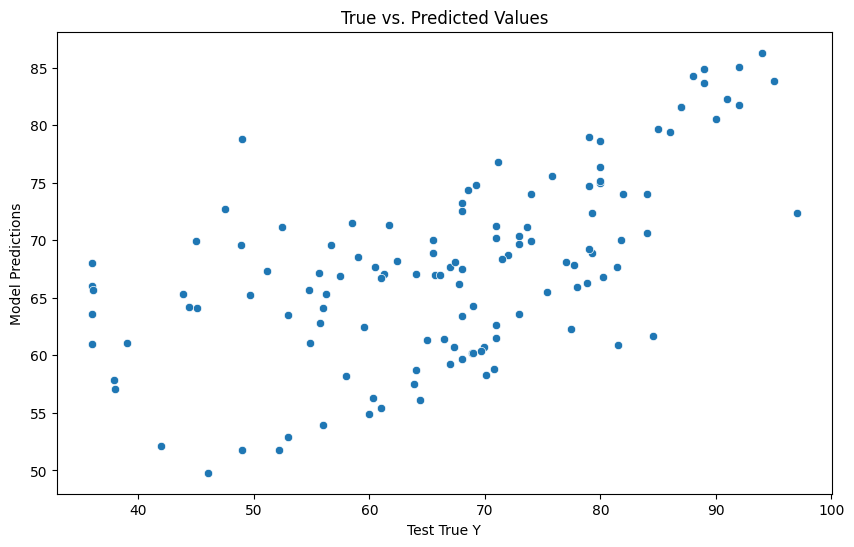

In [276]:
# Create a scatter plot with a regression line  and true vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)
plt.title("True vs. Predicted Values")
plt.show()


In [278]:
# MAE - Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, test_predictions)
print(f"MAE: {mae:.2f}")

# MSE - Mean Squared Error
mse = metrics.mean_squared_error(y_test, test_predictions)
print(f"MSE: {mse:.2f}")

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# R-squared
r2 = metrics.r2_score(y_test, test_predictions)
print(f"R-squared: {r2:.2f}")

# Explained Variance Score
explained_variance = metrics.explained_variance_score(y_test, test_predictions)
print(f"Explained Variance Score: {explained_variance:.2f}")


MAE: 9.20
MSE: 138.98
RMSE: 11.79
R-squared: 0.36
Explained Variance Score: 0.36


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Trying the Model in Practice
</h1

In [66]:
df.head(1)

University Rating  SOP  LOR   Research  Chance of Admit   Admision Score
0               4.00 4.50  4.50      1.00             92.00          237.52

In [67]:
tester_row

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4 4.50  4.50  9.65         1

In [68]:
# Scale the tester input row using the same scaler (sc) that was used for training data
tester_input = sc.transform(tester_row)

# Use the trained model to predict the chance of admit for the scaled input
result = model.predict(tester_input)

# Print an empty line for formatting
print()

# Print the result (predicted chance of admit)
print("Estimated chance of admit:")

# Convert the predicted value to a percentage and round it off
print(round(result[0][0]*100), "%")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- CGPA
- GRE Score
- TOEFL Score
Feature names seen at fit time, yet now missing:
- Admision Score


In [ ]:
# Saving the model
model.save('my_model.keras')  


In [ ]:
# Save the scaler to a file
joblib.dump(sc, 'scaler.pkl')